In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from more_itertools import consecutive_groups

In [2]:
data = pd.read_csv('./results.csv')
ground_truth = data['ground_truth']
attnLSTM = data['AttnLSTM']
time = pd.read_csv('../data/nyc_taxi_test.csv')['1'][-(1000-50-1):].values
time = pd.to_datetime(time.tolist())

In [4]:
rmse = np.sqrt(mean_squared_error(ground_truth,attnLSTM))
mse = mean_squared_error(ground_truth,attnLSTM)
mae = mean_absolute_error(ground_truth,attnLSTM)
r2 = r2_score(ground_truth,attnLSTM)
r2_adjusted = 1-((1-r2)*(np.shape(ground_truth)[0]-1))/(np.shape(ground_truth)[0]-1-10)
print(('>>> MultiheadLSTM %.3f(RMSE) %.3f(MSE) %.3f(MAE) %.3f(R^2) %.3f(R^2_adjusted)'%(rmse,mse,mae,r2,r2_adjusted)))

>>> MultiheadLSTM 2100.018(RMSE) 4410077.666(MSE) 1586.271(MAE) 0.921(R^2) 0.920(R^2_adjusted)


In [8]:
result = {'F1-SCORE': 0.6666666666666666,
 'PRECISION': 0.5,
 'RECALL': 1.0,
 'false_negatives': 0,
 'false_positives': 1,
 'fp_sequences': [[1, 77]],
 'ground_truth': [[606, 812]],
 'num_anoms': 1,
 'tp_sequences': [(600, 817)],
 'true_positives': 1}
pprint(result)

{'F1-SCORE': 0.6666666666666666,
 'PRECISION': 0.5,
 'RECALL': 1.0,
 'false_negatives': 0,
 'false_positives': 1,
 'fp_sequences': [[1, 77]],
 'ground_truth': [[606, 812]],
 'num_anoms': 1,
 'tp_sequences': [(600, 817)],
 'true_positives': 1}


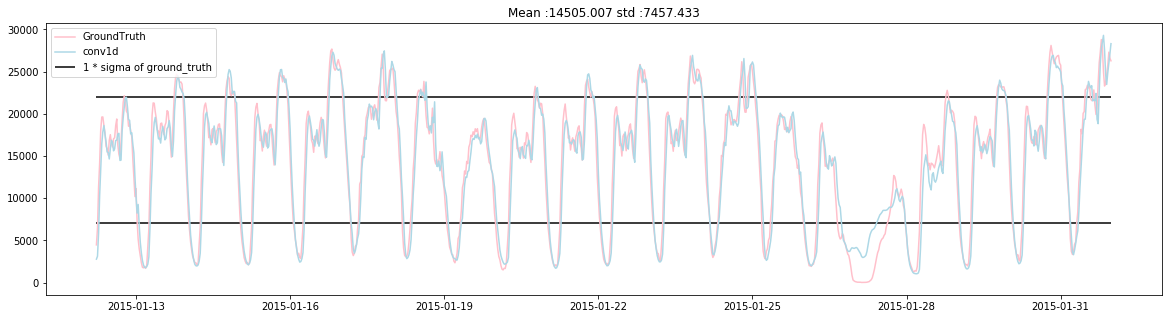

In [9]:
mean_value = np.mean(ground_truth)
std_value = np.std(ground_truth)
plt.figure(figsize=(20,5))
plt.plot(time,ground_truth,label='GroundTruth',c='pink')
plt.plot(time,attnLSTM,label='conv1d',c='lightblue')
plt.hlines(mean_value+std_value,time[0],time[-1],color = 'black',label='1 * sigma of ground_truth')
plt.hlines(mean_value-std_value,time[0],time[-1],color = 'black')
plt.legend()
plt.title('Mean :%.3f std :%.3f'%(mean_value,std_value))
plt.show()

[606, 812]


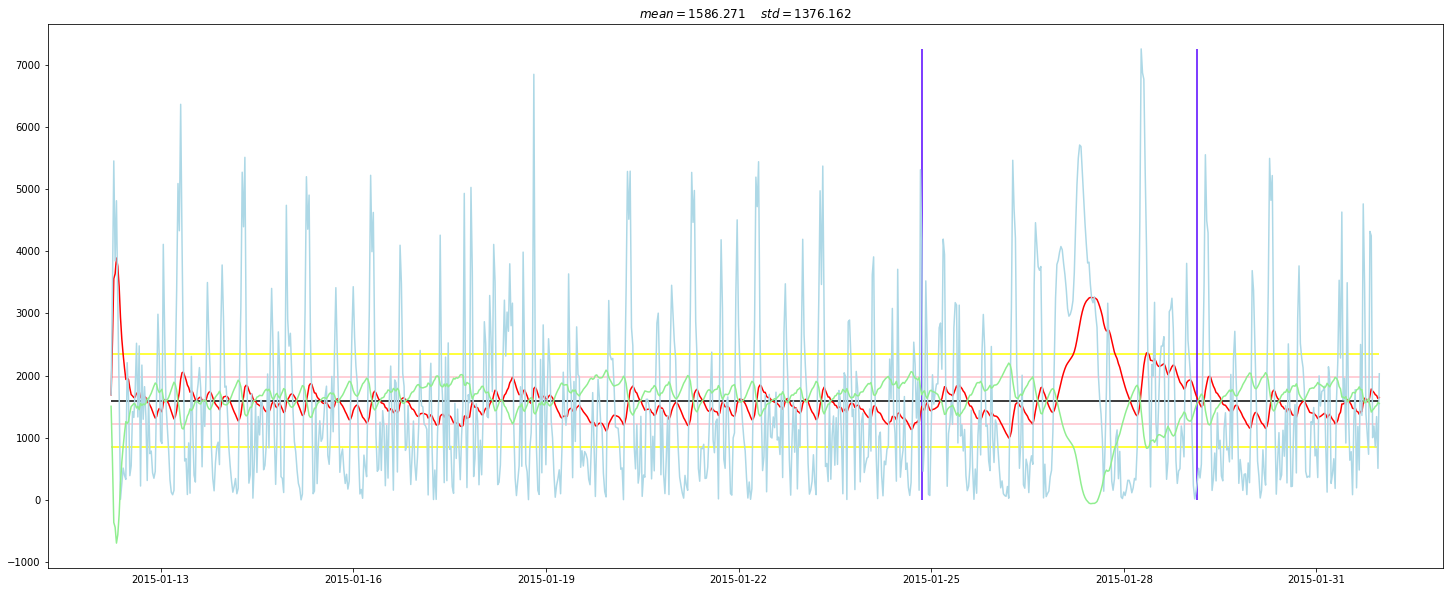

In [10]:
wrong = ["2015-01-24 20:30:00.00",
         "2015-01-29 03:30:00.00"]
wrong = pd.to_datetime(wrong)
real_idx = []
for i,j in enumerate(time):
    if j in wrong:
        real_idx.append(i)
print(real_idx)
e = np.abs(ground_truth-attnLSTM)
es = pd.DataFrame(e).ewm(span=48).mean().values.flatten().tolist()
mean,std = np.mean(es),np.std(es)
es_inv = mean + mean - np.array(es)
plt.figure(figsize=(25,10))
plt.plot(time,es,label='smooth_error',c='r')
plt.plot(time,e,label='error',c='lightblue')
plt.plot(time,es_inv,label='smooth_error',c='lightgreen')
plt.hlines(mean,time[0],time[-1])
plt.hlines(mean+std,time[0],time[-1],color='pink')
plt.hlines(mean-std,time[0],time[-1],color='pink')
plt.hlines(mean+2*std,time[0],time[-1],color='yellow')
plt.hlines(mean-2*std,time[0],time[-1],color='yellow')
plt.vlines(time[real_idx[0]],ymin = min(e),ymax = max(e),color='#5500FF')
plt.vlines(time[real_idx[1]],ymin = min(e),ymax = max(e),color='#5500FF')
plt.title('$mean = %.3f$    $std = %.3f$'%(np.mean(e),np.std(e)))
plt.show()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


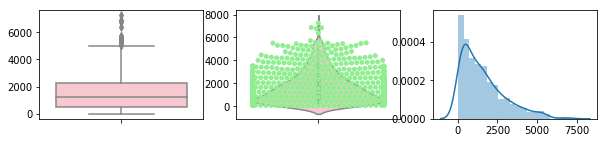

In [11]:
plt.figure(figsize=(10,2))
plt.subplot(131)
sns.boxplot(y=e,color = 'pink')
plt.subplot(132)
sns.violinplot(data=e,color = 'pink')
sns.swarmplot(y=e,color = 'lightgreen')
plt.subplot(133)
sns.distplot(e)
plt.show()